In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.optimizers import Adam
from keras.losses import MAE

from sklearn.metrics import mean_absolute_percentage_error


### Import the dataset and processing data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pakawat-Tan/Predict-price/main/Dataset/Gold_data.csv", parse_dates=True, index_col='date')
df

,open,high,low,close,volume
date,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...
2023-09-15,1923.500000,1927.300049,1923.500000,1923.699951,8
2023-09-18,1928.199951,1931.500000,1926.400024,1931.500000,19
2023-09-19,1934.000000,1934.000000,1932.000000,1932.000000,6


In [3]:
fig = px.line(df,y='open',x=df.index,
              title='Gold Price History Data')
fig.show()

In [4]:
df['volume'].max()

386334

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-08-30 to 2023-09-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5785 non-null   float64
 1   high    5785 non-null   float64
 2   low     5785 non-null   float64
 3   close   5785 non-null   float64
 4   volume  5785 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 271.2 KB


In [6]:
fig = px.scatter_matrix(df,
                        dimensions=['open','high','low','close','volume'],
                        color='volume')
fig.show()

In [7]:
df.index = pd.to_datetime(df.index)
df

,open,high,low,close,volume
date,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...
2023-09-15,1923.500000,1927.300049,1923.500000,1923.699951,8
2023-09-18,1928.199951,1931.500000,1926.400024,1931.500000,19
2023-09-19,1934.000000,1934.000000,1932.000000,1932.000000,6


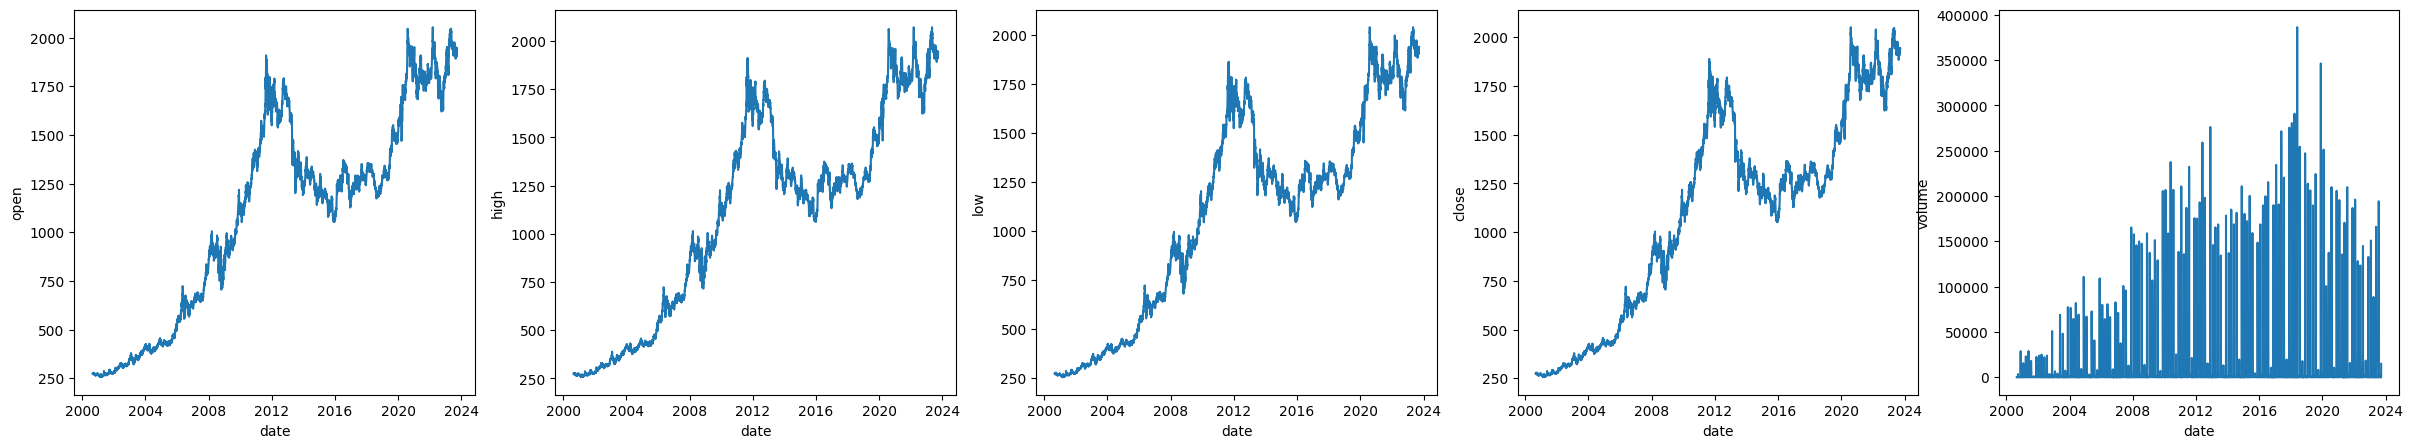

In [8]:
fig, axes = plt.subplots(1, 5, figsize = (30, 5))
axes = axes.flatten()

sns.lineplot(ax = axes[0], x = df.index, y = df["open"]);
sns.lineplot(ax = axes[1], x = df.index, y = df["high"]);
sns.lineplot(ax = axes[2], x = df.index, y = df["low"]);
sns.lineplot(ax = axes[3], x = df.index, y = df["close"]);
sns.lineplot(ax = axes[4], x = df.index, y = df["volume"]);

In [9]:
fig = px.scatter(df, x=df.index, y=['low','high'])
fig.show()

In [10]:
fig = px.histogram(df, x=df.index, y='volume', text_auto = True, hover_data  = df.columns)
fig.show()

In [11]:
df.describe()

,open,high,low,close,volume
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,1097.965878,1103.428038,1092.176699,1097.873172,4291.521867
std,525.381147,528.319196,522.240896,525.321150,24425.954392
min,255.000000,256.100006,255.000000,255.100006,0.000000
25%,602.000000,605.599976,598.200012,604.099976,20.000000
50%,1214.900024,1222.000000,1209.300049,1216.099976,103.000000
75%,1504.800049,1511.599976,1496.099976,1503.199951,393.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


In [12]:
Train_data = df[:4000][['open','high','low','close']]
Test_data = df[4000:][['open','high','low','close']]


In [13]:
# Create the plot
fig = px.line()
fig.add_scatter(x=Train_data.index, y=Train_data['open'], name='Train data')
fig.add_scatter(x=Test_data.index, y=Test_data['open'], name='Test data')
fig.show()

In [14]:
x_train = Train_data
y_train = Train_data['open']
X_test = Test_data
Y_test = Test_data['open']
Y_test

date
2016-08-15    1336.500000
2016-08-16    1342.199951
2016-08-17    1345.500000
2016-08-18    1351.300049
2016-08-19    1350.099976
                 ...     
2023-09-15    1923.500000
2023-09-18    1928.199951
2023-09-19    1934.000000
2023-09-20    1945.599976
2023-09-21    1939.599976
Name: open, Length: 1785, dtype: float64

In [15]:
print('X_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', Y_test.shape)

X_train Shape:  (4000, 4)
y_train Shape:  (4000,)
X_test Shape:   (1785, 4)
y_test Shape:   (1785,)


### Create model 

In [16]:
def Model(opt,loss,metrics):
    Model = Sequential()
    Model.add(LSTM(units=40,activation='relu', return_sequences=True, input_shape=(None,1))),
    Model.add(LSTM(512, activation='relu', return_sequences=True)),
    Model.add(LSTM(32, activation='relu', return_sequences=False)),
    Model.add(Dense(16,activation='relu'))
    Model.add(Dense(1,activation='linear'))
    Model.compile(optimizer=opt, loss=loss,metrics=[metrics])
    Model.summary()
    
    return Model

### Train model

In [17]:
auto_lr = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.00001, decay_rate=1e-6, decay_steps=1, staircase=False)

In [18]:
model = Model(opt=Adam(learning_rate=auto_lr),loss=MAE ,metrics='mae')
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 40)          6720      
                                                                 
 lstm_1 (LSTM)               (None, None, 512)         1132544   
                                                                 
 lstm_2 (LSTM)               (None, 32)                69760     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1209569 (4.61 MB)
Trainable params: 1209569 (4.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
100/100

In [19]:
fig = px.line(title='Loss')
fig.add_scatter(y=history.history['loss'], name='loss')
fig.add_scatter(y=history.history['val_loss'], name='val_loss')
fig.show()


In [20]:
preform = model.predict(X_test)

loss = model.evaluate(X_test,Y_test)
MAPE = mean_absolute_percentage_error(Y_test,preform)
Accury = 1-MAPE

56/56 [==============================] - 1s 6ms/step - loss: 0.1721 - mae: 0.1721


In [21]:
print('Loss : ', loss[0])
print('MAPE : ', MAPE)
print('Accury : ', Accury)

Loss :  0.1721273511648178
MAPE :  0.00010295303056000581
Accury :  0.99989704696944


In [22]:
def Predict_data(data_input, Data_slide):
    predictions = []
    for i in range(len(data_input) + Data_slide):
        if i < len(data_input):
            X_pred = data_input[i:i + 1]
        else:
            X_pred = data_input[-1:]
        predictions.append(model.predict(X_pred)[0])
    return np.array(predictions)

In [29]:
predictions = Predict_data(data_input=X_test,Data_slide=1)

1/1 [==============================] - 0s 9ms/step


In [30]:
predictions = pd.DataFrame(predictions)
predictions

,0
0,1336.544434
1,1342.348145
2,1345.455444
3,1351.344604
4,1350.002808
...,...
1781,1928.707642
1782,1934.356567
1783,1945.736450
1784,1940.370483


In [31]:
fig = px.line(title='Predict vs Actual')
fig.add_scatter(x=Y_test.index, y=Y_test, name='Actual Open')
fig.add_scatter(x=Y_test.index, y=predictions[0], name='Predict')
fig.show()

In [32]:
fig = px.line(title='Predict')
fig.add_scatter(y=predictions[0], name='Open')
fig.show()

In [33]:
fig = px.line(title='Predict vs Data')
fig.add_scatter(x=Train_data.index, y=Train_data['open'], name='data open')
fig.add_scatter(x=Y_test.index, y=Y_test, name='Actual Open')
fig.add_scatter(x=Y_test.index, y=predictions[0], name='Open')
fig.show()